# Assignment 9

## Assignment 9.1

What is the idea of S3VM? What problems need to be addressed? What are advantages
and disadvantages? How does the $\text{SVM}^{\text{light}}$ try to solve the optimization problem?

Semi-supervised support vector machines (S3VM). The idea is simply to incorporate unlabelled data to the SVM problem-solving framework. The fundamental goal is to find the largest margin which separates not only the labelled but also the unlabelled data. The figure below illustrates the implementation of S3VM: the dashed line is the widest margin for labelled data only whereas the solid line margin separates best the unlabelled data together with the labelled data. 

<div align=center>
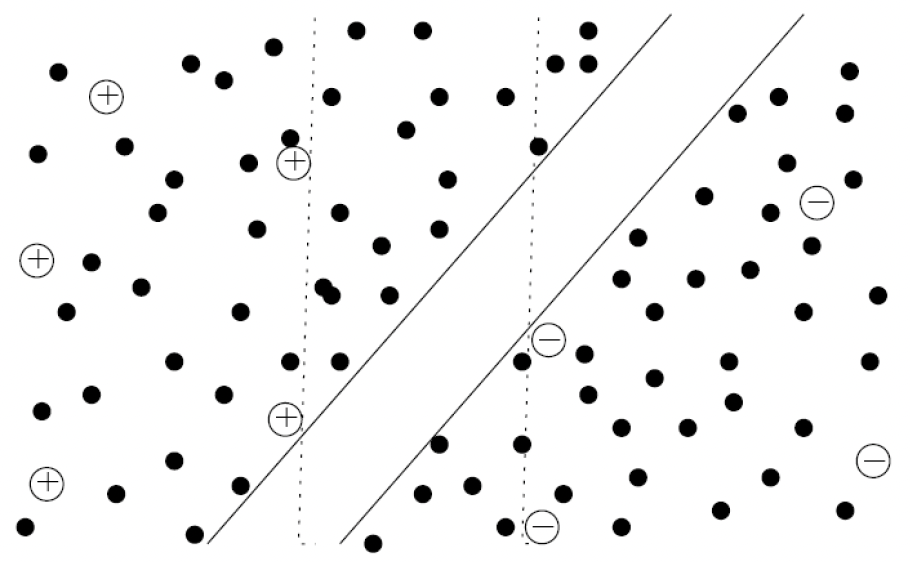   
</div>

The process comprises enumeraitng all possible labellings of the unlabelled dataset and then picking the SVM with the widest margin. Standard SVM with a hard margin assumes data which cannot be linearly separated in its original space can be linearly separated in another space to which we can project the data by virtue of kernels and separating the data in a binary fashion with a hyperplane. However, this may not be possible either and that is why we can introduce the soft margin with slack variables to allow for missclassification. The loss derived from missclassified points is describe by the hinge loss function (for labelled data). We can extendd this to S3VM and allow for missclassification of unlabelled data with a hat loss function. 

The advantage is again that we incorporate more data points into our model and we can get closer to the ground truth. A related advantage is cost efficiency - no need to perform costly data-labelling for all data. One disadvantage is that directly optimising S3VMs can lead to unballanced classification wherein most points fall into one class, though this can be mitigated by some balancing constraints. Another disadvantge ist hat the hat loss function is not convex, unlike the hinge function, which makes the optimisation very difficult. 

$\text{SVM}^{\text{light}}$ is based on a local combinatorial seach and it assigns hard labels to unlabelled data. It starts by training an SVM on the labelld data only. It then centres around swapping labels between two unlabelled data points if that decreases the loss. It's this iterative process that is effective (chunking small tasks for efficient computer memory use)

## Assignment 9.2

Consider the following given data points in $R^2$
: (1; 3) and (2; 4) labeled with +; (3; 1)
and (4; 2) labeled with -; (1; 1), (1; 2), (4; 3), (4; 4) unlabeled. Show how the branch
and bound method would determine the best hyperplane. For this purpose, visualize the
search tree and the corresponding hyperplane for each node. You do not need to exactly
compute the values for the minimization. A roughly estimated hyperplane in a diagram
is sufficient.

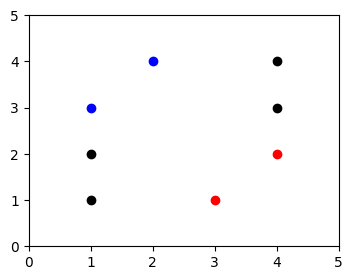

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

pos_data = np.array([[1, 3], [2, 4]])
neg_data = np.array([[3, 1], [4, 2]])
unlabelled_data = np.array([[1, 1], [1, 2], [4, 3], [4, 4]])

_, ax = plt.subplots(figsize=(4, 3))

plt.scatter(pos_data[:, 0], pos_data[:, 1], c="b")
plt.scatter(neg_data[:, 0], neg_data[:, 1], c="r")
plt.scatter(unlabelled_data[:, 0], unlabelled_data[:, 1], c="k")

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

[LibLinear]..............................
optimization finished, #iter = 307
Objective value = -0.250000
nSV = 4


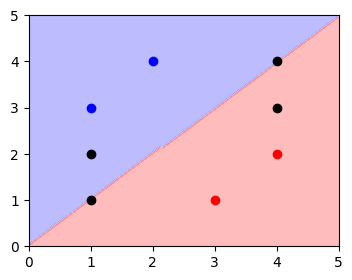

In [67]:
X = np.vstack((pos_data, neg_data))
y = [0, 0, 1, 1]
clf = svm.LinearSVC(loss="hinge", dual="auto", verbose=1)
clf.fit(X, y)

_, ax = plt.subplots(figsize=(4, 3))

common_params = {"estimator": clf, "X": X, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="contourf",
    cmap='bwr',
    alpha=0.3,
)

plt.scatter(pos_data[:, 0], pos_data[:, 1], c="b")
plt.scatter(neg_data[:, 0], neg_data[:, 1], c="r")
plt.scatter(unlabelled_data[:, 0], unlabelled_data[:, 1], c="k")

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

[LibLinear].....*.*
optimization finished, #iter = 65
Objective value = -1.136364
nSV = 3


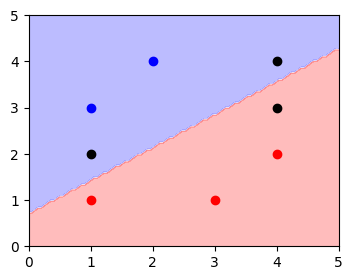

In [71]:
X = np.vstack((pos_data, neg_data, unlabelled_data[0]))
y = [0, 0, 1, 1, 1]
clf = svm.LinearSVC(loss="hinge", dual="auto", verbose=1)
clf.fit(X, y)

_, ax = plt.subplots(figsize=(4, 3))

common_params = {"estimator": clf, "X": X, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="contourf",
    cmap='bwr',
    alpha=0.3,
)

plt.scatter(pos_data[:, 0], pos_data[:, 1], c="b")
plt.scatter(neg_data[:, 0], neg_data[:, 1], c="r")
plt.scatter(1, 1, c="r")
plt.scatter(unlabelled_data[1:, 0], unlabelled_data[1:, 1], c="k")

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

[LibLinear]..*
optimization finished, #iter = 27
Objective value = -1.136364
nSV = 2


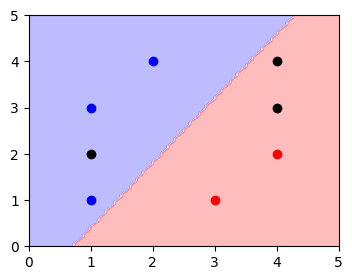

In [72]:
X = np.vstack((pos_data, neg_data, unlabelled_data[0]))
y = [0, 0, 1, 1, 0]
clf = svm.LinearSVC(loss="hinge", dual="auto", verbose=1)
clf.fit(X, y)

_, ax = plt.subplots(figsize=(4, 3))

common_params = {"estimator": clf, "X": X, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="contourf",
    cmap='bwr',
    alpha=0.3,
)

plt.scatter(pos_data[:, 0], pos_data[:, 1], c="b")
plt.scatter(neg_data[:, 0], neg_data[:, 1], c="r")
plt.scatter(1, 1, c="b")
plt.scatter(unlabelled_data[1:, 0], unlabelled_data[1:, 1], c="k")

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

Below is a diagram which shows the branching wherein each box would contain the objective function values. The search need not be fully exhaustive as branches with higher objective function value than the best achieved on the same level don't need to be explored.

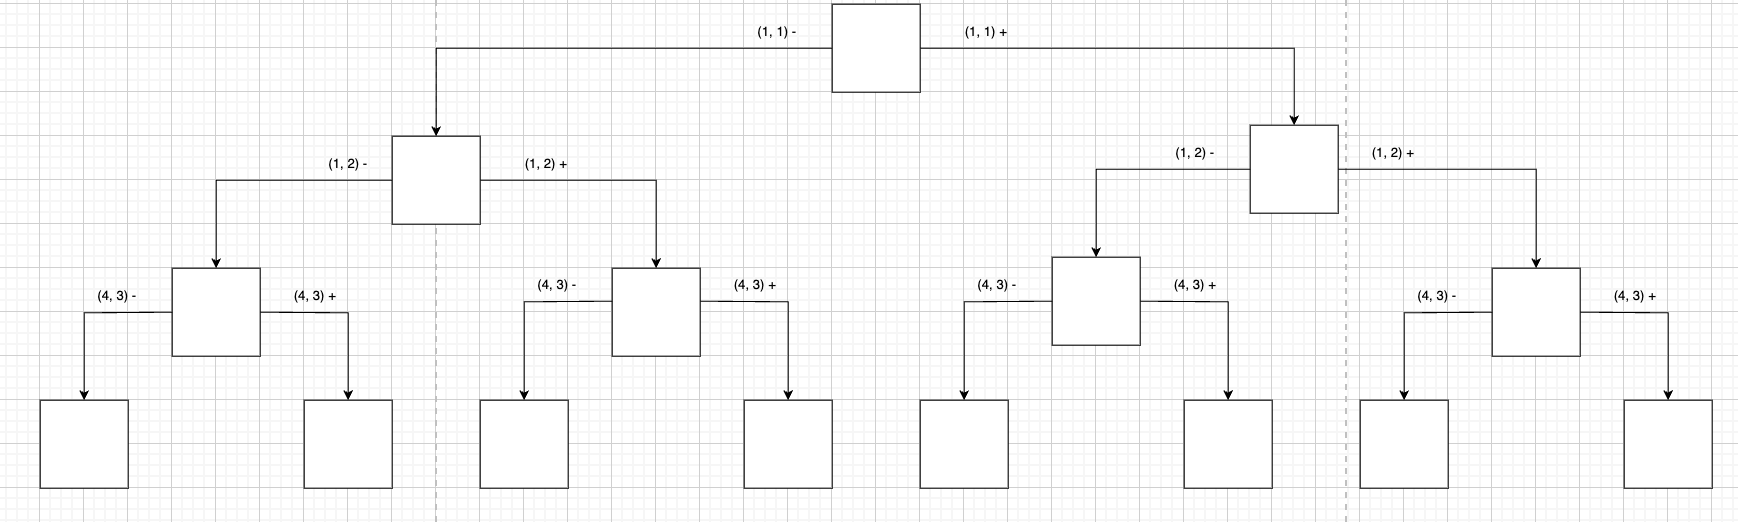

[LibLinear].......**.***
optimization finished, #iter = 86
Objective value = -1.944444
nSV = 4


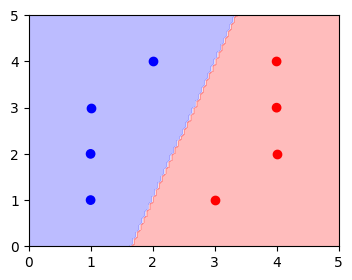

In [98]:
# This is what the best split would look like

X = np.vstack((pos_data, neg_data, unlabelled_data))
y = [0, 0, 1, 1, 0, 0, 1, 1]
clf = svm.LinearSVC(loss="hinge", dual="auto", verbose=1, C=20)
clf.fit(X, y)

_, ax = plt.subplots(figsize=(4, 3))

common_params = {"estimator": clf, "X": X, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="contourf",
    cmap='bwr',
    alpha=0.3,
)

plt.scatter(pos_data[:, 0], pos_data[:, 1], c="b")
plt.scatter(neg_data[:, 0], neg_data[:, 1], c="r")
plt.scatter(unlabelled_data[:, 0], unlabelled_data[:, 1], c=["b", "b", "r", "r"])

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

## Assignment 9.3

What is the idea of graph-based semi-supervised methods?

__a__) Given are data points as shown in the following diagram. Two data points are
already labeled (cross, square). Compute a graph by creating edges between a
point and its two nearest neighbors (and all other points that have the same
distance as the farther of the neighbors) using the manhattan norm. Determine all
possible minimal cuts assuming the inverse of the manhattan norm as similarity
metric. Label previously unlabeled points according to the minimal cuts.
<div align=center>
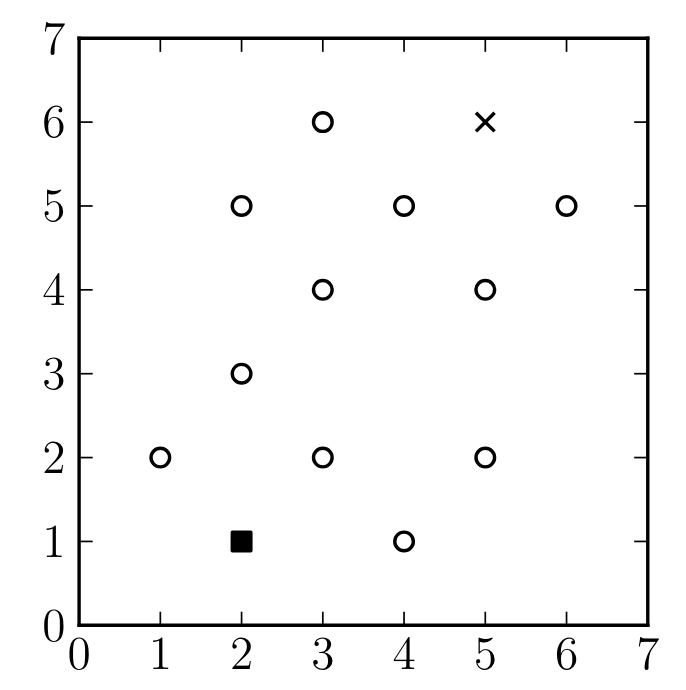   
</div>



<div align=center>
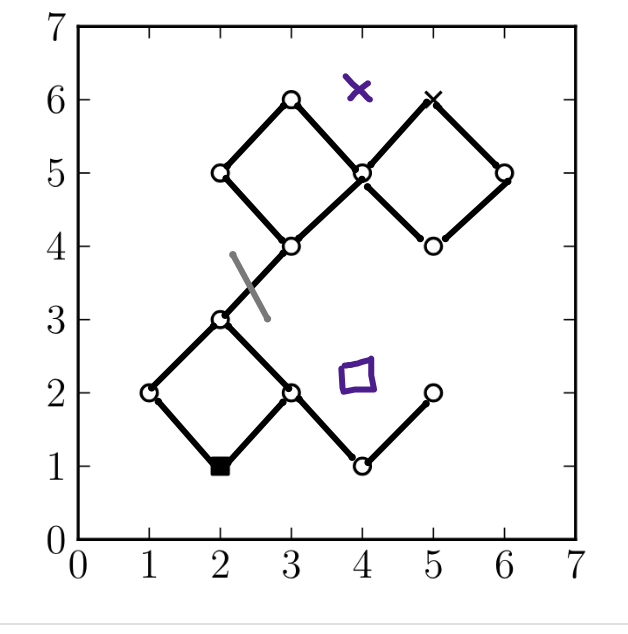   
</div>

__b__) Given are again data points as shown in the following diagram with three labelled
points. Compute a 2-nearest-neighbor graph as in the previous subtask, but use
the euclidean distance this time. What would the result after mincut look like, if
you assume all edges to be of equivalent weight?
<div align=center>
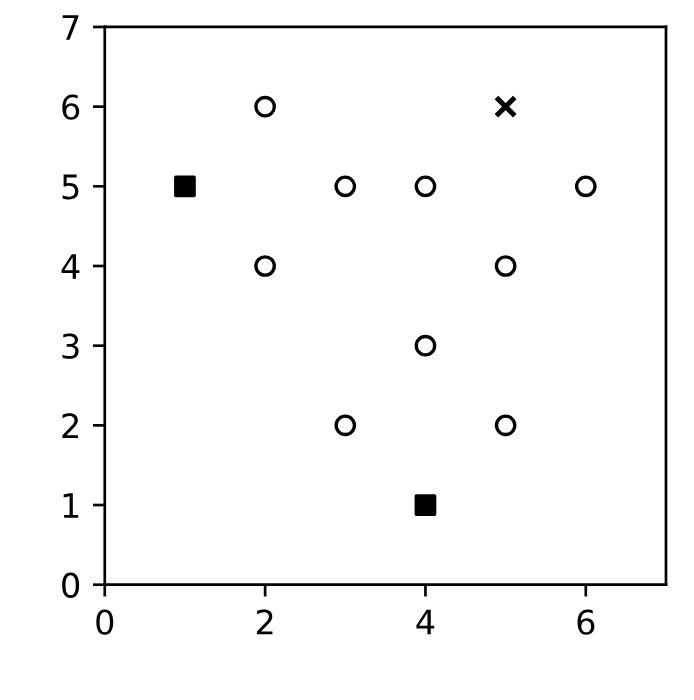   
</div>

<div align=center>
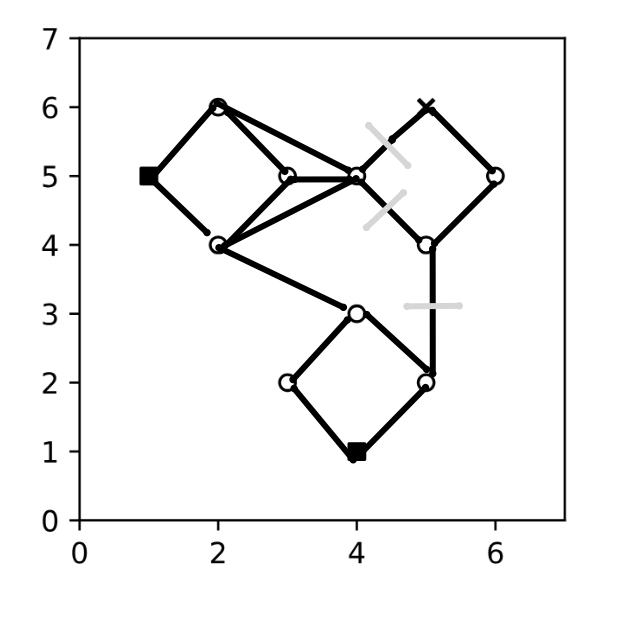   
</div>

## Assignment 9.4

What is the idea of multiview algorithms? Describe different variants and their advantages
and disadvantages.

We can occasionally obtain data in two different features spaces, such as an image and a text pertaining to the same thing. One idea, known as co-training, is to create a classifier for each and then let the classifiers train each other. We assume conditional independence as well as sufficiently good performance for each classifier 